In [1]:
# new path configuration
import tensorflow as tf
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import os
#NEW_PATH =r"C:/Users/96659/Desktop/deep_learning_projects"
#os.chdir(NEW_PATH)
#cwd = os.getcwd()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [2]:
# GPU use
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    device = tf.device("/GPU:0")
    print("Training on GPU... Ready for HyperJump...")
else:
    device = tf.device("/CPU:0")
    print("Training on CPU... May the force be with you...")

Training on GPU... Ready for HyperJump...


In [3]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [4]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('y_train shape:', y_train.shape)
print(x_test.shape[0], 'test samples')

169001437/169001437 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
y_train shape: (50000, 1)
10000 test samples


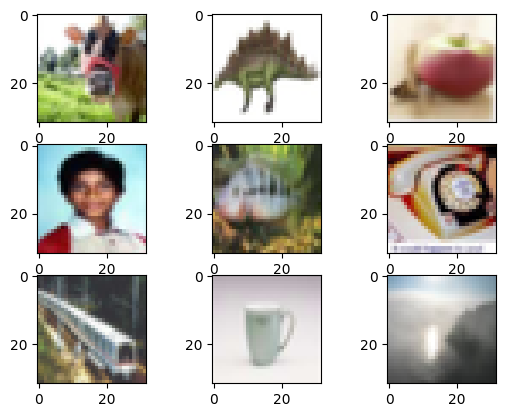

In [5]:
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [6]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes) # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, num_classes)# One-hot encode labels

In [7]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  # Normalize pixel values to the range [0, 1]
x_test /= 255  # Normalize pixel values to the range [0, 1]

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

model_2 = Sequential()

model_2.add(Conv2D(128,(3, 3), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(128, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))


model_2.add(Conv2D(256, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))


model_2.add(Conv2D(512, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(512, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size = 64

# initiate RMSprop optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model=model_2.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=100,
    validation_data=(x_test, y_test)
)

#model1=model_2.fit(x_train, y_train,
 #             batch_size=batch_size,
  #            epochs=20,
   #           validation_data=(x_test, y_test),
    #          shuffle=True)

Epoch 1/100
781/781 [==============================] - 65s 64ms/step - loss: 4.5538 - accuracy: 0.0648 - val_loss: 3.8074 - val_accuracy: 0.1174
Epoch 2/100
781/781 [==============================] - 46s 59ms/step - loss: 3.8621 - accuracy: 0.1252 - val_loss: 3.3910 - val_accuracy: 0.1907
Epoch 3/100
781/781 [==============================] - 45s 58ms/step - loss: 3.4781 - accuracy: 0.1784 - val_loss: 3.1582 - val_accuracy: 0.2209
Epoch 4/100
781/781 [==============================] - 46s 59ms/step - loss: 3.1622 - accuracy: 0.2260 - val_loss: 2.8658 - val_accuracy: 0.2937
Epoch 5/100
781/781 [==============================] - 46s 59ms/step - loss: 2.9238 - accuracy: 0.2663 - val_loss: 2.4122 - val_accuracy: 0.3700
Epoch 6/100
781/781 [==============================] - 46s 59ms/step - loss: 2.7045 - accuracy: 0.3095 - val_loss: 2.3960 - val_accuracy: 0.3808
Epoch 7/100
781/781 [==============================] - 46s 59ms/step - loss: 2.5535 - accuracy: 0.3362 - val_loss: 2.7200 - val_ac

In [13]:
score, acc = model_2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('Test accuracy:', (acc * 100.0))

157/157 [==============================] - 2s 13ms/step - loss: 1.2971 - accuracy: 0.6723
Test score: 1.2970839738845825
Test accuracy: 0.6722999811172485
Test accuracy: 67.22999811172485


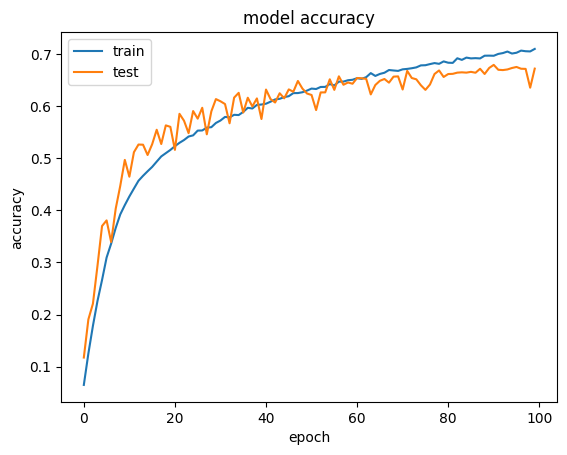

In [11]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

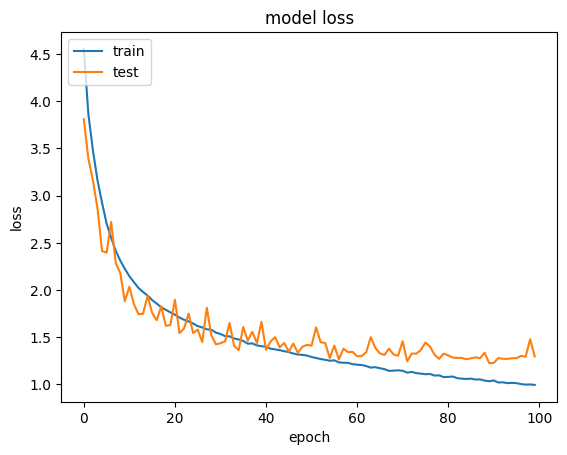

In [12]:
# plot diagnostic learning curves
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()